**Requirements:**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Preliminary Data Preparation:**

**1. Importing the two datasets:**

In [78]:
# drive (Drive is used as reference to store the given dataset)

df1 = pd.read_excel('/content/drive/MyDrive/MEAtec Case Study/LR1865SZ_cycles201214_002_4.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/MEAtec Case Study/LR1865SZ_cycles201217_001_2.xlsx')

In [79]:
df1.head()  # Gives information about what the dataset contains through first five data points

,Data_Point,Test_Time(s),Current(A),Capacity(Ah),Voltage(V),Energy(Wh),Temperature(℃),Date_Time,Cycle_Index
0,1,00:00:00,0.0,0.0,4.1902,0.0,-,2020-12-14 10:16:16,1
1,2,00:00:01,0.0,0.0,4.1902,0.0,-,2020-12-14 10:16:18,1
2,3,00:00:02,0.0,0.0,4.1893,0.0,-,2020-12-14 10:16:19,1
3,4,00:00:04,0.0,0.0,4.1905,0.0,-,2020-12-14 10:16:20,1
4,5,00:00:05,0.0,0.0,4.1902,0.0,-,2020-12-14 10:16:21,1


In [80]:
df2.head() # Gives information about what the dataset contains through first five data points

,Data_Point,Test_Time(s),Current(A),Capacity(Ah),Voltage(V),Energy(Wh),Temperature(℃),Date_Time,Cycle_Index
0,1,00:00:00,0.0,0.0,4.1859,0.0,-,2020-12-17 09:45:59,1
1,2,00:00:02,0.0,0.0,4.1859,0.0,-,2020-12-17 09:46:01,1
2,3,00:00:03,0.0,0.0,4.1859,0.0,-,2020-12-17 09:46:02,1
3,4,00:00:04,0.0,0.0,4.1859,0.0,-,2020-12-17 09:46:03,1
4,5,00:00:05,0.0,0.0,4.1859,0.0,-,2020-12-17 09:46:04,1


**2. Merging the two datasets:**

In [81]:
df = pd.concat([df1, df2], ignore_index=True)
df = df.drop(columns = ['Data_Point'])  # Removing the inconsistent Data_point column containing confusing numbering after the combination of two datasets.
df

,Test_Time(s),Current(A),Capacity(Ah),Voltage(V),Energy(Wh),Temperature(℃),Date_Time,Cycle_Index
0,00:00:00,0.0,0.000,4.1902,0.000,-,2020-12-14 10:16:16,1
1,00:00:01,0.0,0.000,4.1902,0.000,-,2020-12-14 10:16:18,1
2,00:00:02,0.0,0.000,4.1893,0.000,-,2020-12-14 10:16:19,1
3,00:00:04,0.0,0.000,4.1905,0.000,-,2020-12-14 10:16:20,1
4,00:00:05,0.0,0.000,4.1902,0.000,-,2020-12-14 10:16:21,1
...,...,...,...,...,...,...,...,...
329159,1-11:19:45,0.0,0.268,3.7643,1.098,-,2020-12-18 21:05:44,101
329160,1-11:19:45,0.0,0.268,3.7655,1.098,-,2020-12-18 21:05:45,101
329161,1-11:19:47,0.0,0.268,3.7649,1.098,-,2020-12-18 21:05:46,101
329162,1-11:19:48,0.0,0.268,3.7643,1.098,-,2020-12-18 21:05:47,101


**3. Analysis of each variable (Voltage,Time,Current,Capacity,Energy,Cycle_Index):**

In [82]:
print(f"\nDataset Overview:")
print(df.head())
print(f"\nDataset Info:")
print(df.info())  # Gives the information on the data_type, count of each variable's entries.


Dataset Overview:
  Test_Time(s)  Current(A)  Capacity(Ah)  Voltage(V)  Energy(Wh)  \
0     00:00:00         0.0           0.0      4.1902         0.0   
1     00:00:01         0.0           0.0      4.1902         0.0   
2     00:00:02         0.0           0.0      4.1893         0.0   
3     00:00:04         0.0           0.0      4.1905         0.0   
4     00:00:05         0.0           0.0      4.1902         0.0   

  Temperature(℃)           Date_Time  Cycle_Index  
0              - 2020-12-14 10:16:16            1  
1              - 2020-12-14 10:16:18            1  
2              - 2020-12-14 10:16:19            1  
3              - 2020-12-14 10:16:20            1  
4              - 2020-12-14 10:16:21            1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329164 entries, 0 to 329163
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Test_Time(s)    329164 n

In [83]:
#Basic analysis of individual variables
print("Basic Statistics:")
print(df.describe())

# Checking for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())

# Data types
print(f"\nData Types:")
print(df.dtypes)

Basic Statistics:
          Current(A)   Capacity(Ah)     Voltage(V)     Energy(Wh)  \
count  329164.000000  329164.000000  329164.000000  329164.000000   
mean       -0.027540       0.617299       3.718508       2.311602   
min        -7.207000       0.000000       2.999400       0.000000   
25%        -4.807000       0.305000       3.488700       1.117000   
50%         0.000000       0.527000       3.760900       1.966000   
75%         4.807000       0.870000       3.983100       3.258000   
max         7.207000       2.271000       4.200800       8.111000   
std         4.487984       0.417264       0.302283       1.575760   

                           Date_Time    Cycle_Index  
count                         329164  329164.000000  
mean   2020-12-16 14:01:45.993134080      43.453658  
min              2020-12-14 10:16:16       1.000000  
25%    2020-12-15 09:20:20.750000128      18.000000  
50%              2020-12-16 08:17:17      39.000000  
75%    2020-12-17 22:11:02.249999872

**3. Exploratory Data Analysis:**

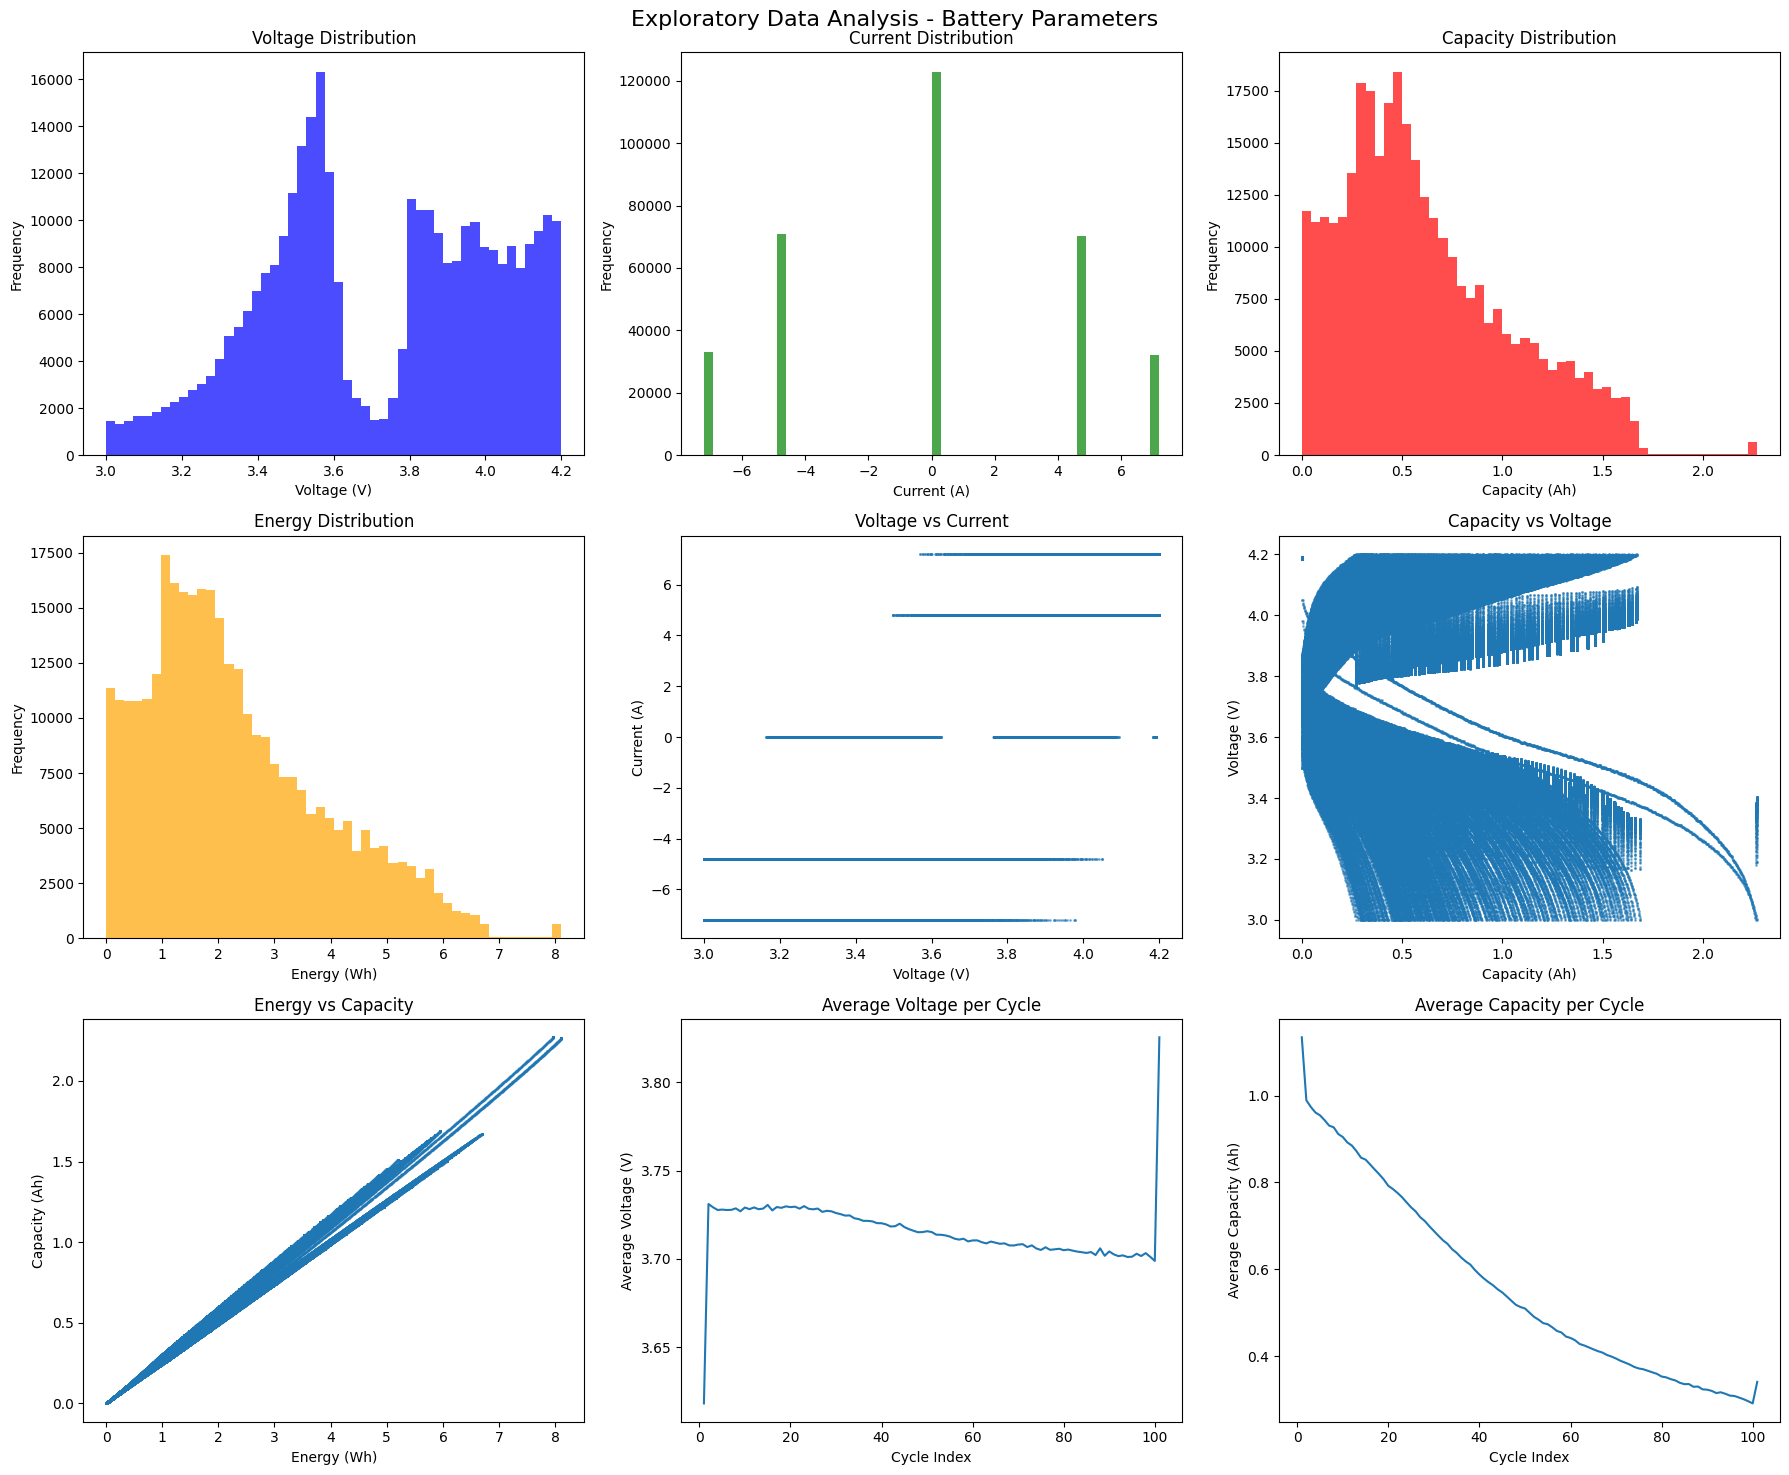

In [84]:
# Create figure for EDA plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Exploratory Data Analysis - Battery Parameters', fontsize=16)

# Univariate Analysis ()
# Voltage distribution
axes[0,0].hist(df['Voltage(V)'], bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('Voltage Distribution')
axes[0,0].set_xlabel('Voltage (V)')
axes[0,0].set_ylabel('Frequency')

# Current distribution
axes[0,1].hist(df['Current(A)'], bins=50, alpha=0.7, color='green')
axes[0,1].set_title('Current Distribution')
axes[0,1].set_xlabel('Current (A)')
axes[0,1].set_ylabel('Frequency')

# Capacity distribution
axes[0,2].hist(df['Capacity(Ah)'], bins=50, alpha=0.7, color='red')
axes[0,2].set_title('Capacity Distribution')
axes[0,2].set_xlabel('Capacity (Ah)')
axes[0,2].set_ylabel('Frequency')

# Energy distribution
axes[1,0].hist(df['Energy(Wh)'], bins=50, alpha=0.7, color='orange')
axes[1,0].set_title('Energy Distribution')
axes[1,0].set_xlabel('Energy (Wh)')
axes[1,0].set_ylabel('Frequency')

# Bivariate Analysis
# Voltage vs Current
axes[1,1].scatter(df['Voltage(V)'], df['Current(A)'], alpha=0.5, s=1)
axes[1,1].set_title('Voltage vs Current')
axes[1,1].set_xlabel('Voltage (V)')
axes[1,1].set_ylabel('Current (A)')

# Capacity vs Voltage
axes[1,2].scatter(df['Capacity(Ah)'], df['Voltage(V)'], alpha=0.5, s=1)
axes[1,2].set_title('Capacity vs Voltage')
axes[1,2].set_xlabel('Capacity (Ah)')
axes[1,2].set_ylabel('Voltage (V)')

# Energy vs Capacity
axes[2,0].scatter(df['Energy(Wh)'], df['Capacity(Ah)'], alpha=0.5, s=1)
axes[2,0].set_title('Energy vs Capacity')
axes[2,0].set_xlabel('Energy (Wh)')
axes[2,0].set_ylabel('Capacity (Ah)')

# Cycle analysis
cycle_stats = df.groupby('Cycle_Index').agg({
    'Voltage(V)': 'mean',
    'Current(A)': 'mean',
    'Capacity(Ah)': 'mean'
}).reset_index()

axes[2,1].plot(cycle_stats['Cycle_Index'], cycle_stats['Voltage(V)'])
axes[2,1].set_title('Average Voltage per Cycle')
axes[2,1].set_xlabel('Cycle Index')
axes[2,1].set_ylabel('Average Voltage (V)')

axes[2,2].plot(cycle_stats['Cycle_Index'], cycle_stats['Capacity(Ah)'])
axes[2,2].set_title('Average Capacity per Cycle')
axes[2,2].set_xlabel('Cycle Index')
axes[2,2].set_ylabel('Average Capacity (Ah)')

plt.tight_layout()
plt.show()

**4. Data Cleaning:**

In [85]:
# Function to convert time string to seconds as per the manufacture information.
def time_string_to_seconds(time_str):
    """
    Convert time string in format '0:00:00' or '0-0:00:00' to seconds

    Parameters:
    time_str (str): Time string in various formats

    Returns:
    int: Time in seconds
    """
    if pd.isna(time_str) or time_str == '':
        return 0

    # Convert to string and clean
    time_str = str(time_str).strip()

    # Handle different separators (-, :)
    # Replace '-' with ':' for consistency
    time_str = time_str.replace('-', ':')

    # Split by ':'
    parts = time_str.split(':')

    try:
        if len(parts) == 3:
            # Format: H:MM:SS or HH:MM:SS
            hours = int(parts[0])
            minutes = int(parts[1])
            seconds = int(parts[2])
            return hours * 3600 + minutes * 60 + seconds

        elif len(parts) == 4:
            # Format: D:H:MM:SS (days:hours:minutes:seconds)
            days = int(parts[0])
            hours = int(parts[1])
            minutes = int(parts[2])
            seconds = int(parts[3])
            return days * 86400 + hours * 3600 + minutes * 60 + seconds

        elif len(parts) == 2:
            # Format: MM:SS
            minutes = int(parts[0])
            seconds = int(parts[1])
            return minutes * 60 + seconds

        elif len(parts) == 1:
            # Just seconds
            return int(parts[0])

        else:
            print(f"Warning: Unrecognized time format: {time_str}")
            return 0

    except (ValueError, IndexError) as e:
        print(f"Error converting time '{time_str}': {e}")
        return 0



In [86]:
print("Original Test_Time samples:")
print(df['Test_Time(s)'].head(10))

# Applying time conversion in the imported dataset
df['Test_Time(s)'] = df['Test_Time(s)'].apply(time_string_to_seconds)
print(df['Test_Time(s)'].head(10))

Original Test_Time samples:
0    00:00:00
1    00:00:01
2    00:00:02
3    00:00:04
4    00:00:05
5    00:00:06
6    00:00:07
7    00:00:08
8    00:00:09
9    00:00:10
Name: Test_Time(s), dtype: object
0     0
1     1
2     2
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Test_Time(s), dtype: int64


**5. Charging_capacity and Discharging_capacity in each cycle**

In [87]:
# Separating charging and discharging phases
df_charge = df[df['Current(A)'] > 0].copy()
df_discharge = df[df['Current(A)'] < 0].copy()

print(f"Charging phase data points: {len(df_charge)}")
print(f"Discharging phase data points: {len(df_discharge)}")
print(f"Total data points: {len(df)}")


Charging phase data points: 102320
Discharging phase data points: 103835
Total data points: 329164


In [88]:
# Updated function to calculate the capacity for each cycle using dataset-based method
def calculate_cycle_capacity_from_dataset(df_phase, phase_name):
    """
    Extract capacity directly from the dataset by taking the maximum
    cumulative capacity reached in each cycle.
    """
    cycle_capacities = []

    for cycle in sorted(df_phase['Cycle_Index'].unique()):
        cycle_data = df_phase[df_phase['Cycle_Index'] == cycle].copy()

        if len(cycle_data) > 0:
            # The capacity column in the dataset appears to be cumulative
            # Take the maximum capacity reached in this cycle
            max_capacity = cycle_data['Capacity(Ah)'].max()

            cycle_capacities.append({
                'Cycle_Index': cycle,
                f'{phase_name}_Capacity(Ah)': abs(max_capacity),  # Use absolute value
                f'{phase_name}_DataPoints': len(cycle_data)
            })

    return pd.DataFrame(cycle_capacities)

# Calculating capacities for both phases using dataset-based method
charge_capacities = calculate_cycle_capacity_from_dataset(df_charge, 'Charge')
discharge_capacities = calculate_cycle_capacity_from_dataset(df_discharge, 'Discharge')

# Merging charge and discharge capacities for display
cycle_summary = pd.merge(charge_capacities, discharge_capacities,
                        on='Cycle_Index', how='outer')

print("Cycle Capacity Summary (first 10 cycles):")
print(cycle_summary.head(10))

print(f"\nCapacity Statistics:")
print(f"Charge capacity range: {cycle_summary['Charge_Capacity(Ah)'].min():.3f} - {cycle_summary['Charge_Capacity(Ah)'].max():.3f} Ah")
print(f"Discharge capacity range: {cycle_summary['Discharge_Capacity(Ah)'].min():.3f} - {cycle_summary['Discharge_Capacity(Ah)'].max():.3f} Ah")
print(f"Number of cycles analyzed: {len(cycle_summary)}")


Cycle Capacity Summary (first 10 cycles):
   Cycle_Index  Charge_Capacity(Ah)  Charge_DataPoints  \
0            1                  NaN                NaN   
1            2                1.672             1979.0   
2            3                1.666             1960.0   
3            4                1.647             1927.0   
4            5                1.633             1910.0   
5            6                1.625             1888.0   
6            7                1.607             1873.0   
7            8                1.598             1843.0   
8            9                1.583             1793.0   
9           10                1.570             1800.0   

   Discharge_Capacity(Ah)  Discharge_DataPoints  
0                   2.271                2798.0  
1                   1.687                2012.0  
2                   1.662                1958.0  
3                   1.644                1927.0  
4                   1.627                1902.0  
5                  

**6. C-rate Calculations:**

In [89]:
# Cell capacity constant
CELL_CAPACITY = 2.3  # Ah

# Calculating C-rate: C-rate = Current(A) / Cell Capacity (Ah)
df['C_rate'] = df['Current(A)'] / CELL_CAPACITY
df_charge['C_rate'] = df_charge['Current(A)'] / CELL_CAPACITY
df_discharge['C_rate'] = df_discharge['Current(A)'] / CELL_CAPACITY

print("C-rate Statistics:")
print(df['C_rate'].describe())

print(f"\nCharging C-rate range: {df_charge['C_rate'].min():.2f} to {df_charge['C_rate'].max():.2f}")
print(f"Discharging C-rate range: {df_discharge['C_rate'].min():.2f} to {df_discharge['C_rate'].max():.2f}")


C-rate Statistics:
count    329164.000000
mean         -0.011974
std           1.951297
min          -3.133478
25%          -2.090000
50%           0.000000
75%           2.090000
max           3.133478
Name: C_rate, dtype: float64

Charging C-rate range: 2.09 to 3.13
Discharging C-rate range: -3.13 to -2.09


In [90]:
# Adding C-rate information (ensure only one C_rate column is used)
crate_column = 'C_rate'
if crate_column in df_charge.columns:
    charge_crate = df_charge.groupby('Cycle_Index')[crate_column].mean().reset_index()
    charge_crate.columns = ['Cycle_Index', 'Avg_Charge_Crate']
    cycle_summary = pd.merge(cycle_summary, charge_crate, on='Cycle_Index', how='left')
else:
    print("Warning: 'C_rate' column missing in df_charge")

if crate_column in df_discharge.columns:
    discharge_crate = df_discharge.groupby('Cycle_Index')[crate_column].mean().reset_index()
    discharge_crate.columns = ['Cycle_Index', 'Avg_Discharge_Crate']
    cycle_summary = pd.merge(cycle_summary, discharge_crate, on='Cycle_Index', how='left')
else:
    print("Warning: 'C_rate' column missing in df_discharge")

# Drop any duplicate C-rate columns if they exist
for col in cycle_summary.columns:
    if col.endswith('_x') or col.endswith('_y'):
        cycle_summary.drop(columns=col, inplace=True)

# Display results
cycle_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cycle_Index             101 non-null    int64  
 1   Charge_Capacity(Ah)     100 non-null    float64
 2   Charge_DataPoints       100 non-null    float64
 3   Discharge_Capacity(Ah)  100 non-null    float64
 4   Discharge_DataPoints    100 non-null    float64
 5   Avg_Charge_Crate        100 non-null    float64
 6   Avg_Discharge_Crate     100 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 5.7 KB


**7. Visualizations:**

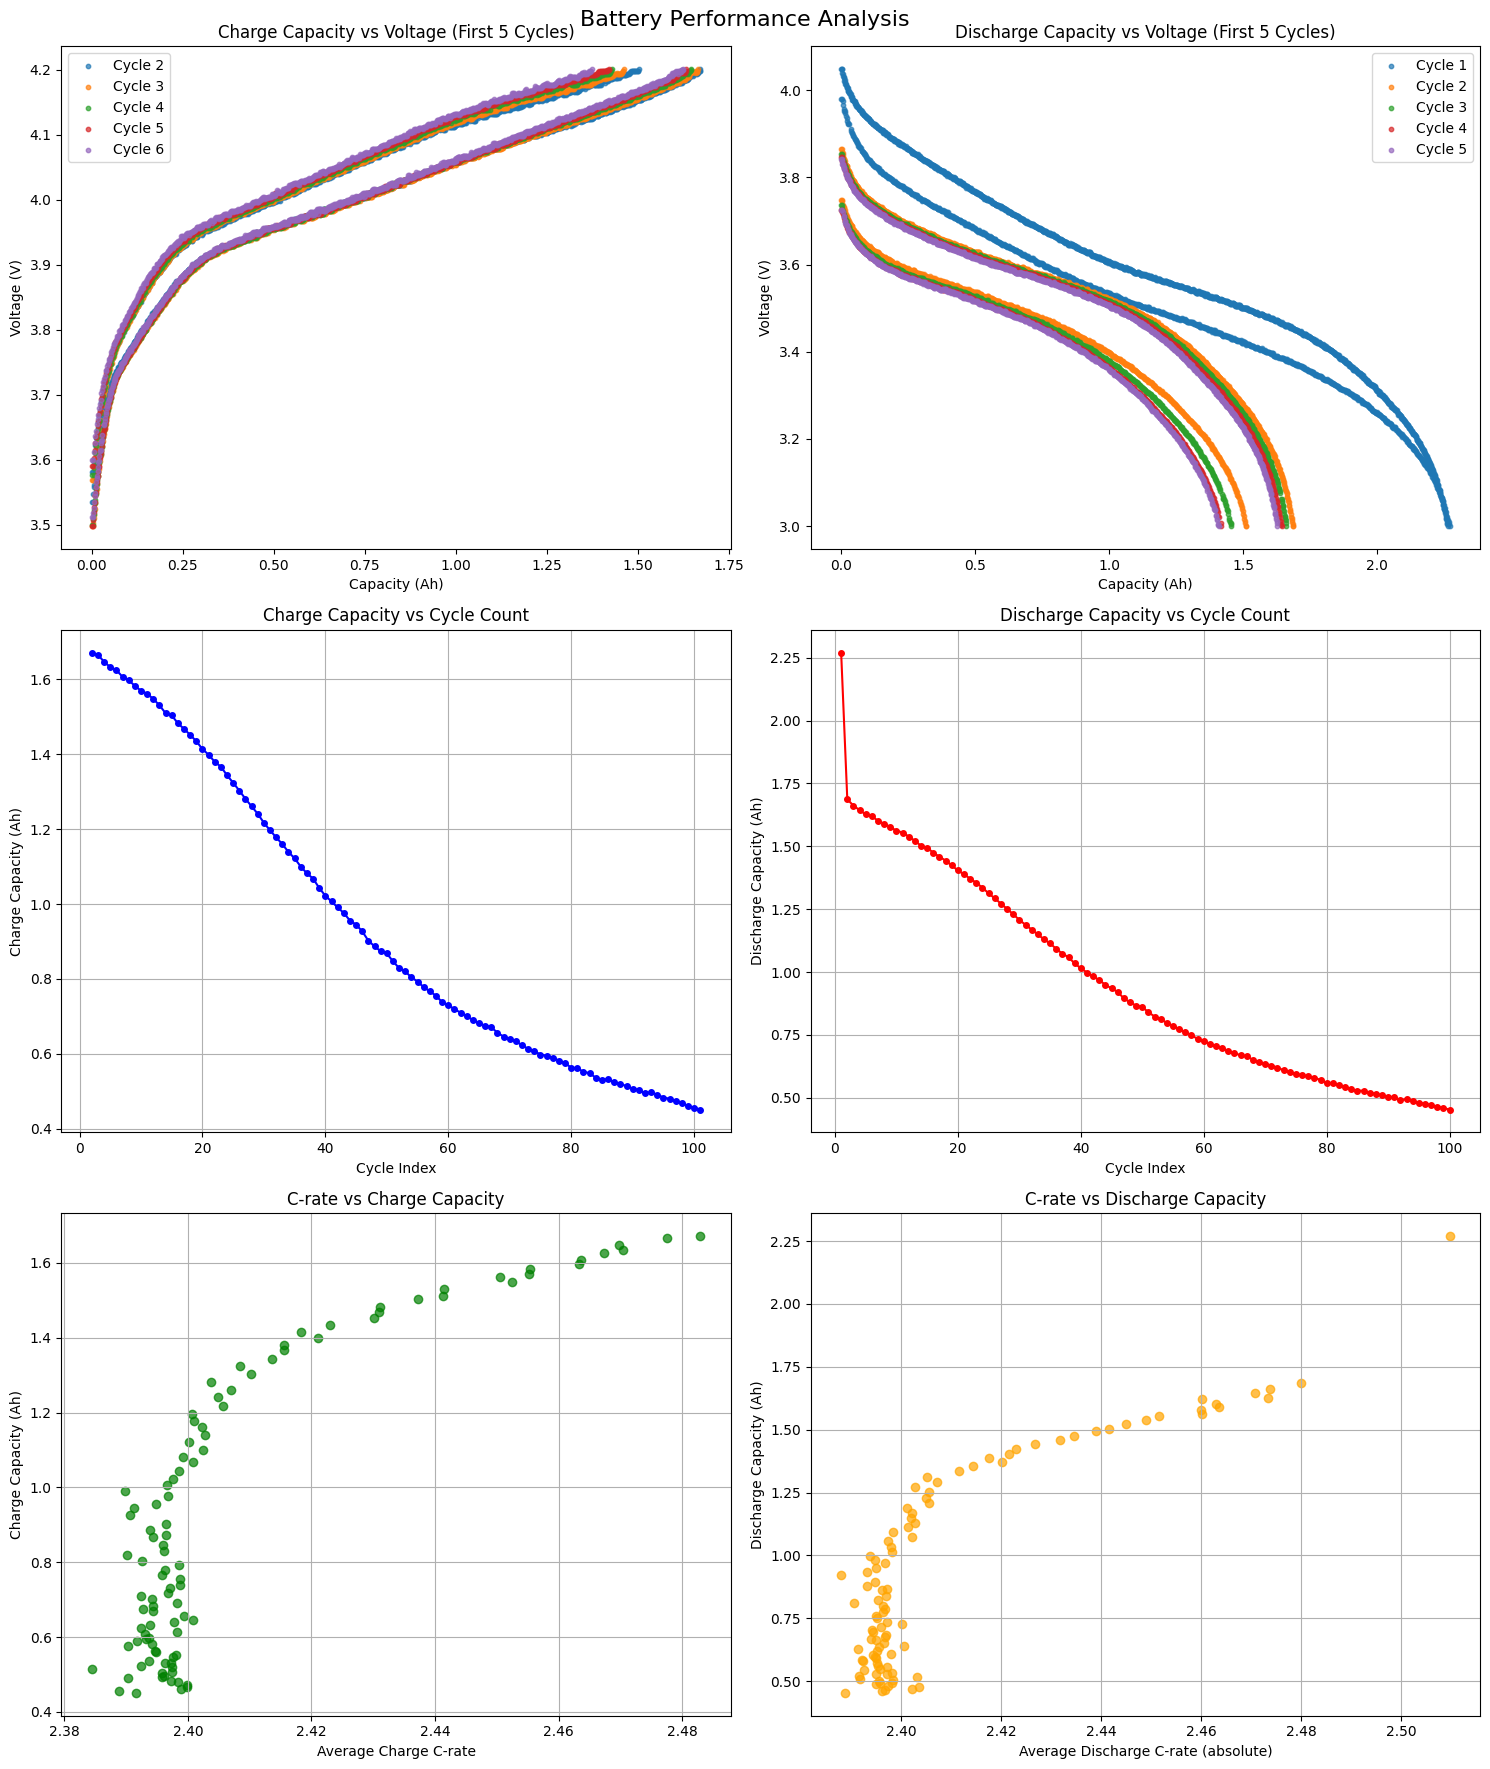

In [91]:
# Visualization plots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Battery Performance Analysis', fontsize=16)

# Charge Capacity vs Voltage (by cycle)
for i, cycle in enumerate(sorted(df_charge['Cycle_Index'].unique())[:5]):  # First 5 cycles
    cycle_data = df_charge[df_charge['Cycle_Index'] == cycle]
    axes[0,0].scatter(cycle_data['Capacity(Ah)'], cycle_data['Voltage(V)'],
                     label=f'Cycle {cycle}', alpha=0.7, s=10)
axes[0,0].set_title('Charge Capacity vs Voltage (First 5 Cycles)')
axes[0,0].set_xlabel('Capacity (Ah)')
axes[0,0].set_ylabel('Voltage (V)')
axes[0,0].legend()

# Discharge Capacity vs Voltage (by cycle)
for i, cycle in enumerate(sorted(df_discharge['Cycle_Index'].unique())[:5]):  # First 5 cycles
    cycle_data = df_discharge[df_discharge['Cycle_Index'] == cycle]
    axes[0,1].scatter(cycle_data['Capacity(Ah)'], cycle_data['Voltage(V)'],
                     label=f'Cycle {cycle}', alpha=0.7, s=10)
axes[0,1].set_title('Discharge Capacity vs Voltage (First 5 Cycles)')
axes[0,1].set_xlabel('Capacity (Ah)')
axes[0,1].set_ylabel('Voltage (V)')
axes[0,1].legend()

# Charge Capacity vs Cycle Count
axes[1,0].plot(cycle_summary['Cycle_Index'], cycle_summary['Charge_Capacity(Ah)'],
               'o-', color='blue', markersize=4)
axes[1,0].set_title('Charge Capacity vs Cycle Count')
axes[1,0].set_xlabel('Cycle Index')
axes[1,0].set_ylabel('Charge Capacity (Ah)')
axes[1,0].grid(True)

# Discharge Capacity vs Cycle Count
axes[1,1].plot(cycle_summary['Cycle_Index'], cycle_summary['Discharge_Capacity(Ah)'],
               'o-', color='red', markersize=4)
axes[1,1].set_title('Discharge Capacity vs Cycle Count')
axes[1,1].set_xlabel('Cycle Index')
axes[1,1].set_ylabel('Discharge Capacity (Ah)')
axes[1,1].grid(True)

# C-rate vs Charge Capacity
axes[2,0].scatter(cycle_summary['Avg_Charge_Crate'], cycle_summary['Charge_Capacity(Ah)'],
                 alpha=0.7, color='green')
axes[2,0].set_title('C-rate vs Charge Capacity')
axes[2,0].set_xlabel('Average Charge C-rate')
axes[2,0].set_ylabel('Charge Capacity (Ah)')
axes[2,0].grid(True)

# C-rate vs Discharge Capacity
axes[2,1].scatter(cycle_summary['Avg_Discharge_Crate'].abs(), cycle_summary['Discharge_Capacity(Ah)'],
                 alpha=0.7, color='orange')
axes[2,1].set_title('C-rate vs Discharge Capacity')
axes[2,1].set_xlabel('Average Discharge C-rate (absolute)')
axes[2,1].set_ylabel('Discharge Capacity (Ah)')
axes[2,1].grid(True)

plt.tight_layout()
plt.show()


In [92]:
print("Analysis of C-rate influence on battery capacity:")
print("\nKey Observations:")

# Calculating correlation between C-rate and capacity
charge_corr = cycle_summary[['Avg_Charge_Crate', 'Charge_Capacity(Ah)']].corr().iloc[0,1]
discharge_corr = cycle_summary[['Avg_Discharge_Crate', 'Discharge_Capacity(Ah)']].assign(Avg_Discharge_Crate=cycle_summary['Avg_Discharge_Crate'].abs()).corr().iloc[0,1]

# Higher values of charge_corr reflects capacity loss at higher charging rates due to resistance, heat, and kinetic limitations. it is true for discharge_corr too.
# Observation in charging and discharging phase capacity over cycles shows that both have similar graph due to consistent data processing and symmetric test conditions.
print(f"1. Correlation between Charge C-rate and Charge Capacity: {charge_corr:.3f}")
print(f"2. Correlation between Discharge C-rate and Discharge Capacity: {discharge_corr:.3f}")

print(f"\n4. C-rate Impact:")
print(f"   - Higher C-rates typically reduce available capacity due to:")
print(f"     * Increased internal resistance losses")
print(f"     * Heat generation and temperature effects")
print(f"     * Incomplete electrochemical reactions at high rates")


Analysis of C-rate influence on battery capacity:

Key Observations:
1. Correlation between Charge C-rate and Charge Capacity: 0.827
2. Correlation between Discharge C-rate and Discharge Capacity: 0.842

4. C-rate Impact:
   - Higher C-rates typically reduce available capacity due to:
     * Increased internal resistance losses
     * Heat generation and temperature effects
     * Incomplete electrochemical reactions at high rates


9. Poly Regression Technique:

In [93]:
def perform_polynomial_regression(x, y, degree=2, prediction_cycles=20):
    """Performing polynomial regression and extrapolate"""
    # Prepare data
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)

    # Fit model
    model = LinearRegression()
    model.fit(x_poly, y)

    # Predictions on existing data
    y_pred = model.predict(x_poly)

    # Future predictions
    future_cycles = np.arange(x.max() + 1, x.max() + prediction_cycles + 1).reshape(-1, 1)
    future_x_poly = poly_features.transform(future_cycles)
    future_pred = model.predict(future_x_poly)

    # Model performance
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    return {
        'model': model,
        'poly_features': poly_features,
        'predictions': y_pred,
        'future_cycles': future_cycles.flatten(),
        'future_predictions': future_pred,
        'r2_score': r2,
        'mse': mse
    }

# Applying polynomial regression to different C-rate groups
print("Polynomial Regression Results:")

# Grouping data by C-rate ranges for charging
cycle_summary_clean = cycle_summary.dropna()

# Charge capacity modeling
charge_model = perform_polynomial_regression(
    cycle_summary_clean['Cycle_Index'],
    cycle_summary_clean['Charge_Capacity(Ah)'],
    degree=2
)

# Discharge capacity modeling
discharge_model = perform_polynomial_regression(
    cycle_summary_clean['Cycle_Index'],
    cycle_summary_clean['Discharge_Capacity(Ah)'],
    degree=2
)

print(f"Charge Capacity Model - R² Score: {charge_model['r2_score']:.3f}")
print(f"Discharge Capacity Model - R² Score: {discharge_model['r2_score']:.3f}")


Polynomial Regression Results:
Charge Capacity Model - R² Score: 0.996
Discharge Capacity Model - R² Score: 0.996


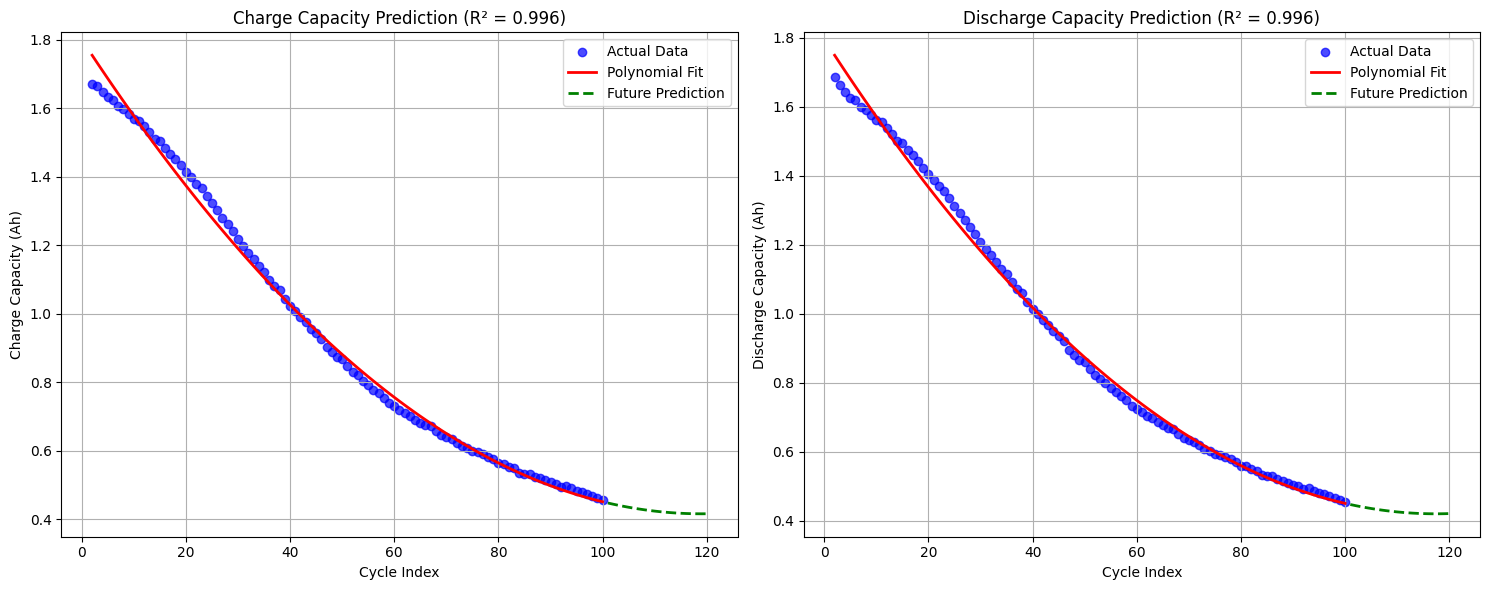

In [94]:
# Visualization of polynomial regression results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Charge capacity prediction
axes[0].scatter(cycle_summary_clean['Cycle_Index'], cycle_summary_clean['Charge_Capacity(Ah)'],
               alpha=0.7, label='Actual Data', color='blue')
axes[0].plot(cycle_summary_clean['Cycle_Index'], charge_model['predictions'],
            'r-', label='Polynomial Fit', linewidth=2)
axes[0].plot(charge_model['future_cycles'], charge_model['future_predictions'],
            'g--', label='Future Prediction', linewidth=2)
axes[0].set_title(f'Charge Capacity Prediction (R² = {charge_model["r2_score"]:.3f})')
axes[0].set_xlabel('Cycle Index')
axes[0].set_ylabel('Charge Capacity (Ah)')
axes[0].legend()
axes[0].grid(True)

# Discharge capacity prediction
axes[1].scatter(cycle_summary_clean['Cycle_Index'], cycle_summary_clean['Discharge_Capacity(Ah)'],
               alpha=0.7, label='Actual Data', color='blue')
axes[1].plot(cycle_summary_clean['Cycle_Index'], discharge_model['predictions'],
            'r-', label='Polynomial Fit', linewidth=2)
axes[1].plot(discharge_model['future_cycles'], discharge_model['future_predictions'],
            'g--', label='Future Prediction', linewidth=2)
axes[1].set_title(f'Discharge Capacity Prediction (R² = {discharge_model["r2_score"]:.3f})')
axes[1].set_xlabel('Cycle Index')
axes[1].set_ylabel('Discharge Capacity (Ah)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


10. State of health (SOH):

In [95]:

# Calculate SOH based on charge capacity
# SOH = (Current Capacity / Initial Capacity) × 100%
initial_capacity = cycle_summary_clean['Charge_Capacity(Ah)'].iloc[0]
cycle_summary_clean = cycle_summary_clean.copy()
cycle_summary_clean['SOH_Charge(%)'] = (cycle_summary_clean['Charge_Capacity(Ah)'] / initial_capacity) * 100

# Calculate SOH based on discharge capacity
initial_discharge_capacity = cycle_summary_clean['Discharge_Capacity(Ah)'].iloc[0]
cycle_summary_clean['SOH_Discharge(%)'] = (cycle_summary_clean['Discharge_Capacity(Ah)'] / initial_discharge_capacity) * 100

print("State of Health Summary:")
print(f"Initial Charge Capacity: {initial_capacity:.3f} Ah")
print(f"Initial Discharge Capacity: {initial_discharge_capacity:.3f} Ah")
print(f"Final SOH (Charge): {cycle_summary_clean['SOH_Charge(%)'].iloc[-1]:.2f}%")
print(f"Final SOH (Discharge): {cycle_summary_clean['SOH_Discharge(%)'].iloc[-1]:.2f}%")


State of Health Summary:
Initial Charge Capacity: 1.672 Ah
Initial Discharge Capacity: 1.687 Ah
Final SOH (Charge): 27.27%
Final SOH (Discharge): 26.85%


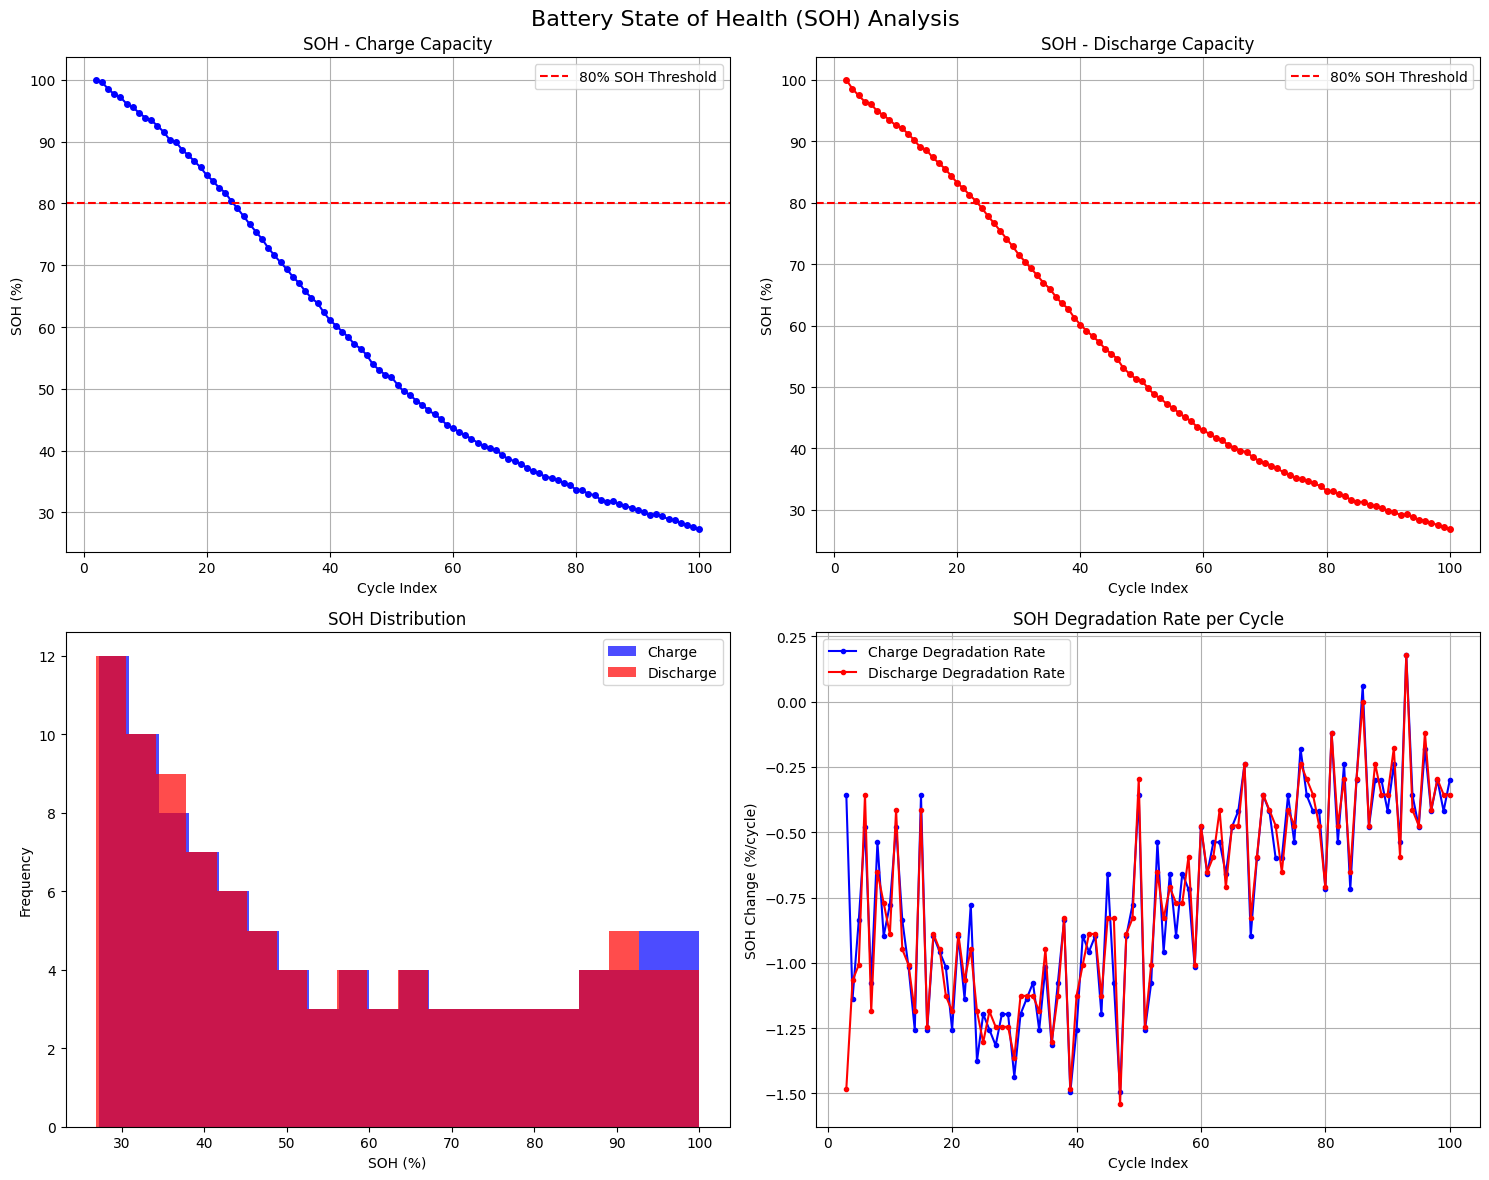

In [96]:
# SOH Degradation Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Battery State of Health (SOH) Analysis', fontsize=16)

# SOH vs Cycle (Charge)
axes[0,0].plot(cycle_summary_clean['Cycle_Index'], cycle_summary_clean['SOH_Charge(%)'],
              'o-', color='blue', markersize=4)
axes[0,0].axhline(y=80, color='red', linestyle='--', label='80% SOH Threshold')
axes[0,0].set_title('SOH - Charge Capacity')
axes[0,0].set_xlabel('Cycle Index')
axes[0,0].set_ylabel('SOH (%)')
axes[0,0].legend()
axes[0,0].grid(True)

# SOH vs Cycle (Discharge)
axes[0,1].plot(cycle_summary_clean['Cycle_Index'], cycle_summary_clean['SOH_Discharge(%)'],
              'o-', color='red', markersize=4)
axes[0,1].axhline(y=80, color='red', linestyle='--', label='80% SOH Threshold')
axes[0,1].set_title('SOH - Discharge Capacity')
axes[0,1].set_xlabel('Cycle Index')
axes[0,1].set_ylabel('SOH (%)')
axes[0,1].legend()
axes[0,1].grid(True)

# SOH Distribution
axes[1,0].hist(cycle_summary_clean['SOH_Charge(%)'], bins=20, alpha=0.7, color='blue', label='Charge')
axes[1,0].hist(cycle_summary_clean['SOH_Discharge(%)'], bins=20, alpha=0.7, color='red', label='Discharge')
axes[1,0].set_title('SOH Distribution')
axes[1,0].set_xlabel('SOH (%)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Degradation Rate Analysis
degradation_rate_charge = np.diff(cycle_summary_clean['SOH_Charge(%)'])
degradation_rate_discharge = np.diff(cycle_summary_clean['SOH_Discharge(%)'])

axes[1,1].plot(cycle_summary_clean['Cycle_Index'][1:], degradation_rate_charge,
              'o-', color='blue', label='Charge Degradation Rate', markersize=3)
axes[1,1].plot(cycle_summary_clean['Cycle_Index'][1:], degradation_rate_discharge,
              'o-', color='red', label='Discharge Degradation Rate', markersize=3)
axes[1,1].set_title('SOH Degradation Rate per Cycle')
axes[1,1].set_xlabel('Cycle Index')
axes[1,1].set_ylabel('SOH Change (%/cycle)')
axes[1,1].legend()
axes[1,1].grid(True)

plt.tight_layout()
plt.show()


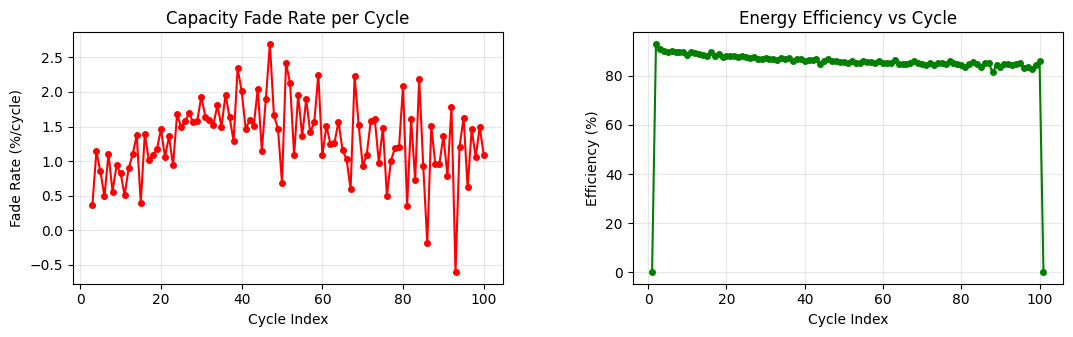

In [97]:
# Visualization dashboard
fig = plt.figure(figsize=(20, 16))

# Defining grid layout for subplots
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Capacity Fade Rate Analysis
ax3 = fig.add_subplot(gs[0, 0])
capacity_fade_rate = -np.diff(cycle_summary_clean['Charge_Capacity(Ah)']) / cycle_summary_clean['Charge_Capacity(Ah)'].iloc[:-1] * 100
ax3.plot(cycle_summary_clean['Cycle_Index'][1:], capacity_fade_rate, 'o-', color='red', markersize=4)
ax3.set_title('Capacity Fade Rate per Cycle')
ax3.set_xlabel('Cycle Index')
ax3.set_ylabel('Fade Rate (%/cycle)')
ax3.grid(True, alpha=0.3)

# 2. Energy Efficiency Analysis
ax4 = fig.add_subplot(gs[0, 1])
# Calculating energy efficiency (discharge energy / charge energy)
charge_energy = df_charge.groupby('Cycle_Index')['Energy(Wh)'].sum()
discharge_energy = df_discharge.groupby('Cycle_Index')['Energy(Wh)'].sum().abs()
energy_efficiency = (discharge_energy / charge_energy * 100).fillna(0)
ax4.plot(energy_efficiency.index, energy_efficiency.values, 'o-', color='green', markersize=4)
ax4.set_title('Energy Efficiency vs Cycle')
ax4.set_xlabel('Cycle Index')
ax4.set_ylabel('Efficiency (%)')
ax4.grid(True, alpha=0.3)


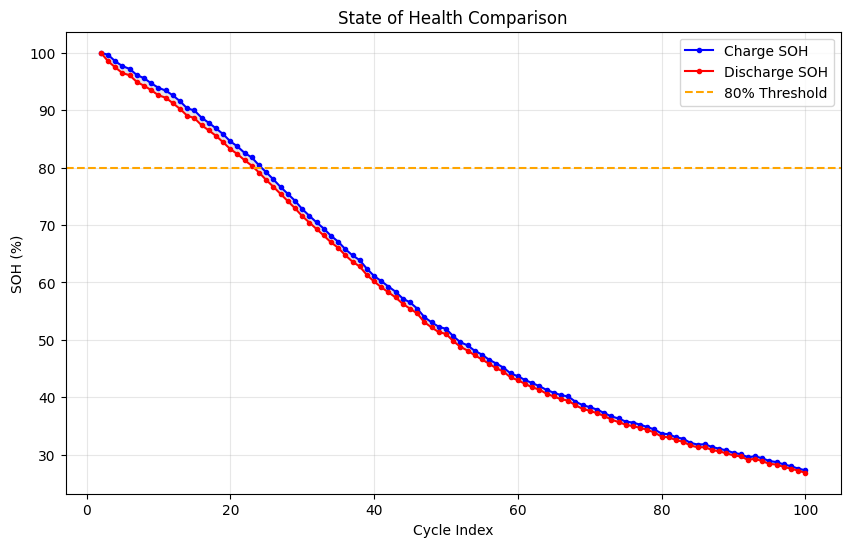

In [98]:

fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(1, 1, hspace=0.3, wspace=0.3)
ax7 = fig.add_subplot(gs[0, 0])

ax7.plot(cycle_summary_clean['Cycle_Index'], cycle_summary_clean['SOH_Charge(%)'],
         'o-', label='Charge SOH', color='blue', markersize=3)
ax7.plot(cycle_summary_clean['Cycle_Index'], cycle_summary_clean['SOH_Discharge(%)'],
         'o-', label='Discharge SOH', color='red', markersize=3)
ax7.axhline(y=80, color='orange', linestyle='--', label='80% Threshold')
ax7.fill_between(cycle_summary_clean['Cycle_Index'],
                cycle_summary_clean['SOH_Charge(%)'],
                cycle_summary_clean['SOH_Discharge(%)'],
                alpha=0.2, color='gray')
ax7.set_title('State of Health Comparison')
ax7.set_xlabel('Cycle Index')
ax7.set_ylabel('SOH (%)')
ax7.legend()
ax7.grid(True, alpha=0.3)

plt.show()

Correlation Matrix:



14. STATISTICAL ANALYSIS
----------------------------------------
Correlation Matrix:
                        Cycle_Index  Charge_Capacity(Ah)  \
Cycle_Index                   1.000               -0.981   
Charge_Capacity(Ah)          -0.981                1.000   
Discharge_Capacity(Ah)       -0.980                1.000   
SOH_Charge(%)                -0.981                1.000   
SOH_Discharge(%)             -0.980                1.000   
Avg_Charge_Crate             -0.749                0.826   
Avg_Discharge_Crate           0.738               -0.818   

                        Discharge_Capacity(Ah)  SOH_Charge(%)  \
Cycle_Index                             -0.980         -0.981   
Charge_Capacity(Ah)                      1.000          1.000   
Discharge_Capacity(Ah)                   1.000          1.000   
SOH_Charge(%)                            1.000          1.000   
SOH_Discharge(%)                         1.000          1.000   
Avg_Charge_Crate                         

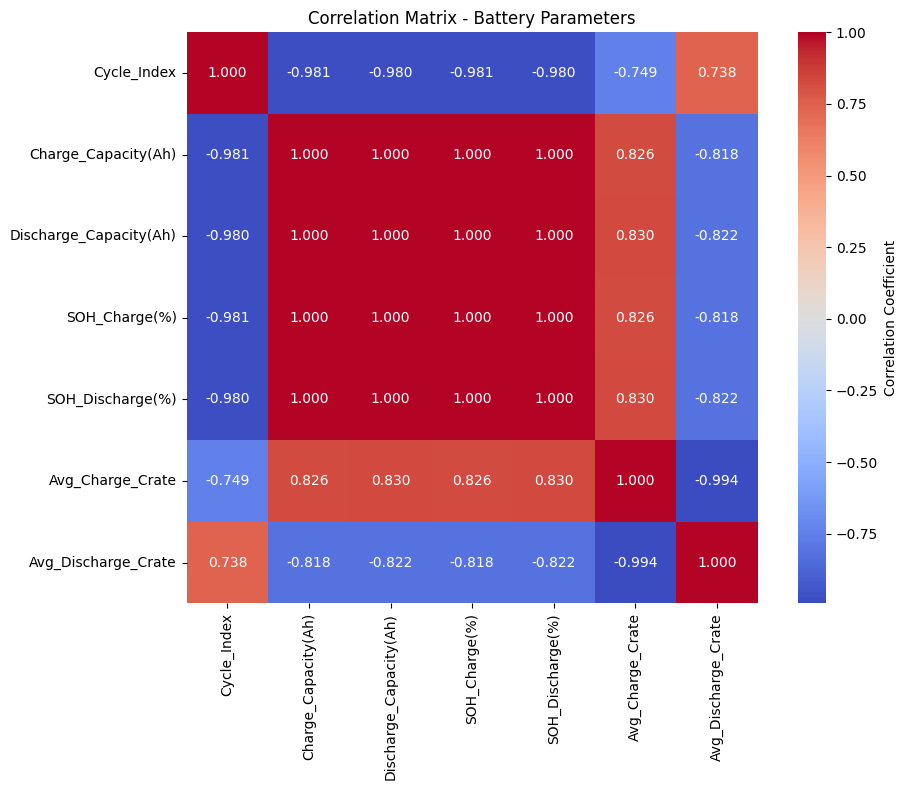


Statistical Significance Tests:
Cycle vs SOH correlation: r=-0.981, p-value=1.37e-70
C-rate vs Capacity correlation: r=0.826, p-value=6.21e-26


In [99]:
print("\n\n14. STATISTICAL ANALYSIS")
print("-" * 40)

# Correlation matrix
correlation_vars = ['Cycle_Index', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)',
                   'SOH_Charge(%)', 'SOH_Discharge(%)', 'Avg_Charge_Crate', 'Avg_Discharge_Crate']
corr_matrix = cycle_summary_clean[correlation_vars].corr()

print("Correlation Matrix:")
print(corr_matrix.round(3))

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix - Battery Parameters')
plt.tight_layout()
plt.show()

# Statistical significance tests
from scipy.stats import pearsonr, spearmanr

print("\nStatistical Significance Tests:")
# Test correlation between cycle and SOH
cycle_soh_corr, cycle_soh_p = pearsonr(cycle_summary_clean['Cycle_Index'],
                                      cycle_summary_clean['SOH_Charge(%)'])
print(f"Cycle vs SOH correlation: r={cycle_soh_corr:.3f}, p-value={cycle_soh_p:.2e}")

# Test correlation between C-rate and capacity
crate_cap_corr, crate_cap_p = pearsonr(cycle_summary_clean['Avg_Charge_Crate'],
                                      cycle_summary_clean['Charge_Capacity(Ah)'])
print(f"C-rate vs Capacity correlation: r={crate_cap_corr:.3f}, p-value={crate_cap_p:.2e}")
